# EOS regimes

We can look at the $\rho$-$T$ plane to understand where each of the components of the EOS
dominate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Physical constants, all in CGS

In [2]:
m_e = 9.11e-28
m_u = 1.66e-24
c = 3.e10
k = 1.38e-16
h = 6.63e-27
a = 5.67e-15
e = 4.8e-10 # esu

# crystallization
Gamma_C = 170

Some composition info.  We'll specify

$$\mu_e = \left [ \sum_k \frac{Z_k X_k}{A_k} \right ]^{-1}$$

$$\mu_I = \left [ \sum_k \frac{X_k}{A_k} \right ]^{-1}$$

and $\mu$ such that 

$$\frac{1}{\mu} = \frac{1}{\mu_e} + \frac{1}{\mu_I}$$

In [3]:
mu_e = 2
mu_I = 1.0

mu = 1.0 / (1.0/mu_e + 1.0/mu_I)

Z = 1.0

## Degeneracy vs. Ideal gas

We find the (dimensionless) Fermi momentum ($x_F = p_F / (mc)$) via

$$n_e = \frac{\rho}{\mu_e m_u} = \int_0^{x_F} x^2 dx$$

where we assume complete degeneracy (so the distribution function is just a step-function).  This gives

$$x_F = \left ( \frac{\rho}{\mu_e B} \right )^{1/3}$$

where the constant $B$ is:

$$B = \frac{8\pi}{3} m_u \left (\frac{m_e c}{h} \right )^3$$

We then define the transition to degeracy by comparing to the thermal energy, $k T$

$$E_F = m_e c^2 \left ( \sqrt{1 + x_F^2} - 1 \right ) \sim k T$$

Here's a function that computes this line

In [4]:
# Fermi momentum constant (from number density integral)
B = (8.0*np.pi/3.0)*m_u*(m_e*c/h)**3

def deg_ideal(rho, mu_e=2.0):
    """temperature on the line separating degeneracy and ideal gas as a function
 of rho"""

    # dimensionless Fermi momentum
    x_F = (rho / mu_e / B)**(1./3.)

    # set E_F = k T
    T = (1./k) * m_e * c**2 * (np.sqrt(1 + x_F**2) - 1)

    return T

## Ideal gas vs. radiation

A simple way to determine whether an ideal case or radiation dominates is to set their energy densities equal.
At the temperatures where we expect this to occur, we will assume that the electrons are not degenerate,
so we will use the full $\mu$ for the composition in the ideal gas instead of $\mu_I$.

Our line is:

$$\frac{\rho k T}{\mu m_u} \sim \frac{1}{3}a T^4$$

Here's a function that computes this

In [5]:
def rad_ideal(rho, mu=0.5):
    """temperature on the line separating radiation and ideal gas as a function 
of rho"""

    T = ((3 * k / (m_u * a)) * (rho / mu))**(1./3.)
    return T

Finally, at low temperatures and high densities, the ions can crystalize.  The comparison where is the thermal energy to the Coulomb energy:

$$\Gamma = \frac{kT}{Z^2 e^2 / a}$$

where we take $\Gamma = 170$ as the point where crystalization sets in.

The separation between ions, $a$ is found via:

$$V = n_I^{-1} = \frac{\mu_I m_u}{\rho} = \frac{4\pi}{3} a^3$$

Putting this together, the expression for the boundary of crystalization is computed below

In [6]:
def crystallization(rho):
    """temperature where crystallization of ions sets in"""

    T = ((rho / mu_I) * (Z**2 * e**2 / (Gamma_C * k))**3 * (4.0 * np.pi / 3.0 / 
m_u))**(1./3.)
    return T

## Plotting the boundaries

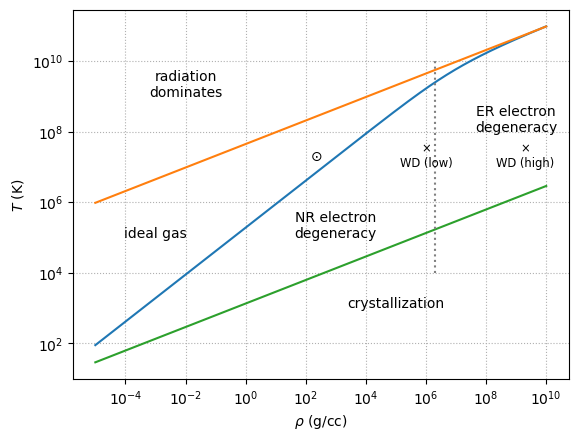

In [7]:
rho = np.logspace(-5, 10, 2000)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(rho, deg_ideal(rho))
ax.plot(rho, rad_ideal(rho))
ax.plot(rho, crystallization(rho))

# NR vs ER degeneracy
ax.vlines(B*mu_e, 1.e4, 1.e10, color="0.5", ls=":")


ax.text(1.e-2, 1.e9, "radiation\ndominates", horizontalalignment="center")
ax.text(1.e-3, 1.e5, "ideal gas", horizontalalignment="center")
ax.text(1.e3, 1.e5, "NR electron\ndegeneracy", horizontalalignment="center")
ax.text(1.e9, 1.e8, "ER electron\ndegeneracy", horizontalalignment="center")
ax.text(1.e5, 1.e3, "crystallization", horizontalalignment="center")

ax.text(150, 1.5e7, "⊙")
ax.text(1.e6, 1.e7, r"$\times$"+"\nWD (low)", horizontalalignment="center", fontsize="small")
ax.text(2.e9, 1.e7, r"$\times$"+"\nWD (high)", horizontalalignment="center", fontsize="small")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$\rho$ (g/cc)")
ax.set_ylabel("$T$ (K)")
ax.grid(ls=":")